### Import modules and packages

In [28]:
import mandulakenyer as mk # Mandelbrot implementations from previous tasks
import mandelbrot_test as mt # unittest file
import mandelbrot_cl as mcl # OpenCL implementation of Mandelbrot

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pyopencl as cl
import time
import pandas as pd

### Parameters

In [3]:
RE_MIN = -2
RE_MAX = 1
RE_SCALE = 1000

IM_MIN = -1.5
IM_MAX = 1.5
IM_SCALE = 1000

T = 2 # threshold
I = 100 # iteration

re = np.linspace(RE_MIN, RE_MAX, RE_SCALE, dtype=np.float32)
im = np.linspace(IM_MIN, IM_MAX, IM_SCALE, dtype=np.float32)

In [4]:
size_params = [RE_MIN, RE_MAX, IM_MIN, IM_MAX]

In [5]:
# for visulalizing the results of algorithms
def plotting(res, size_params):
    plt.figure(figsize=(8,8))
    # plt.title(title)
    plt.imshow(res, cmap='inferno', extent=[size_params[0], size_params[1], size_params[2], size_params[3]])

### Unittest

In [ ]:
! python mandelbrot_test.py

### CL implementation

In [6]:
M = mcl.mandelbrot_cl(re, im, I, T)

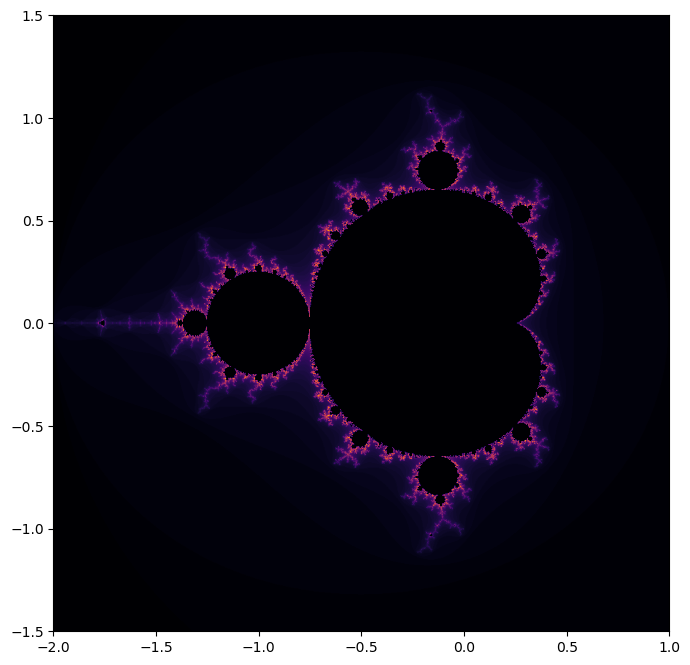

In [7]:
plotting(M, size_params)

működik a gecci

#### Different grid sizes

In [25]:
GRID_SIZE = [100, 500, 1000, 2000, 5000, 10000]
grid_time = {}

for grid in GRID_SIZE:
    re = np.linspace(RE_MIN, RE_MAX, grid, dtype=np.float32)
    im = np.linspace(IM_MIN, IM_MAX, grid, dtype=np.float32)

    t0 = time.time()
    M = mcl.mandelbrot_cl(re, im, I, T)
    t1 = time.time() - t0
    #grid_time.append(t1)

    grid_time[grid] = t1

df_grid = pd.DataFrame(grid_time.items(), columns=['grid_size', 'time'])
# visualize TODO

#### CPU vs. GPU

In [ ]:
pu = {}

for platform in cl.get_platforms():

    for device in platform.get_devices():
        t0 = time.time()
        M = mcl.mandelbrot_cl(re, im, I, T, device)
        t1 = time.time() - t0
        
        pu[device.name] = t1

df_pu = pd.DataFrame(pu.items(), columns=['device_name', 'time'])
# visualize TODO